In [ ]:
from google.colab import drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


trainn = pd.read_csv("phishing.csv")
# 11054 rows and 32 columns

In [ ]:
print(trainn.shape)

(11056, 32)


In [ ]:
missing  = pd.concat([trainn.isnull().sum()],axis = 1 , keys=['Train'])

# New Section

In [ ]:
print(trainn.head())

   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic

In [ ]:
alldata = trainn.drop(["class","Index"],axis =1)

In [ ]:
trainn.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
alldata.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [ ]:
trainn.head

<bound method NDFrame.head of        Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  \
0          0        1        1         1        1              1   
1          1        1        0         1        1              1   
2          2        1        0         1        1              1   
3          3        1        0        -1        1              1   
4          4       -1        0        -1        1             -1   
...      ...      ...      ...       ...      ...            ...   
11051  11051        1       -1         1        1              1   
11052  11052       -1       -1         1        1              1   
11053  11053       -1       -1         1        1              1   
11054  11054        1        1         1        1              1   
11055  11055        1        1         1        1              1   

       PrefixSuffix-  SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  \
0                 -1           0      1            -1  ...                 1   
1                 -1          -1     -1            -1  ...                 1   
2                 -1          -1     -1             1  ...                 1   
3                 -1           1      1            -1  ...                -1   
4                 -1           1      1            -1  ...                 1   
...              ...         ...    ...           ...  ...               ...   
11051             -1           1     -1            -1  ...                 1   
11052             -1          -1     -1             1  ...                -1   
11053             -1          -1     -1             1  ...                 1   
11054              1           0     -1            -1  ...                -1   
11055              1           1     -1             1  ...                -1   

       IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                      1           -1            -1               0        -1   
1                      1            1            -1               1        -1   
2                      1           -1            -1               1        -1   
3                      1           -1            -1               0        -1   
4                      1            1             1               1        -1   
...                  ...          ...           ...             ...       ...   
11051                  1            1             1               1        -1   
11052                  1            1             1               1        -1   
11053                  1           -1             1              -1        -1   
11054                 -1           -1            -1              -1        -1   
11055                  1            1             1              -1        -1   

       GoogleIndex  LinksPointingToPage  StatsReport  class  
0                1                    1            1     -1  
1                1                    0           -1     -1  
2                1                   -1            1     -1  
3                1                    1            1      1  
4                1                   -1           -1      1  
...            ...                  ...          ...    ...  
11051            1                    0            1     -1  
11052            1                    1            1     -1  
11053           -1                    1           -1     -1  
11054            1                   -1            1      1  
11055            1                    1            1      1  

[11056 rows x 32 columns]>

In [ ]:
for col in trainn.dtypes[trainn.dtypes == "object"].index:
  for_dummy = trainn.pop(col)
  trainn = pd.concat([trainn, pd.get_dummies(for_dummy,prefix=col)],axis=1)
  trainn.head()

In [ ]:
labels = trainn.pop("class")

In [ ]:
labels.head

<bound method NDFrame.head of 0       -1
1       -1
2       -1
3        1
4        1
        ..
11051   -1
11052   -1
11053   -1
11054    1
11055    1
Name: class, Length: 11056, dtype: int64>

In [ ]:
labels.shape

(11056,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(trainn, labels,test_size = 0.3, random_state=42)
print(x_test.shape)

(3317, 31)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_predict=rf.predict(x_test)
accuracy_score(rfc_predict,y_test)

0.968947844437745

In [ ]:
#y_pred = rf.predict(x_test)
y_pred = rf.predict([[ 0, 1, -1, 1, -1, 0, -1, 0, -1, -1, -1, 1, -1, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 0, -1, 1, -1, -1 ]])
y_pred = rf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve , auc
false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test,y_pred)# compare between results and actual
roc_auc = auc(false_positive_rate , true_positive_rate)
roc_auc

0.9682854042322302

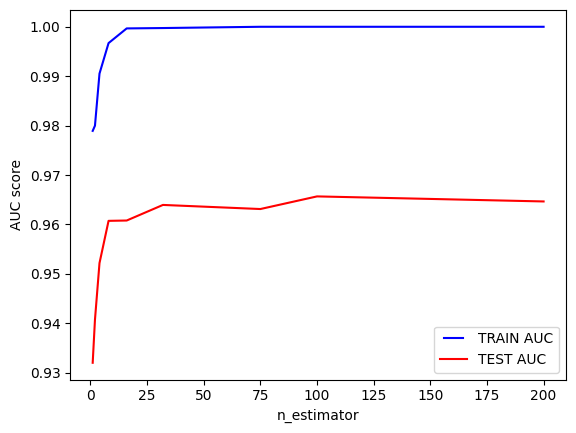

In [ ]:
estim = [1,2,4,8,16,32,75,100,200,]

train_res = []
test_res = []
for estimator in estim:
  rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
  rf.fit(x_train,y_train)
  train_pred = rf.predict(x_train)
  false_positive_rate , true_positive_rate, thresholds = roc_curve(y_train,train_pred)
  roc_auc = auc(false_positive_rate,true_positive_rate)
  train_res.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test,y_pred)
  roc_auc = auc(false_positive_rate,true_positive_rate)
  test_res.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estim, train_res,"b",label="TRAIN AUC")
line2, = plt.plot(estim, test_res,"r",label="TEST AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimator")

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rfc_predict,y_test))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       970
           1       0.97      0.97      0.97      1242

    accuracy                           0.96      2212
   macro avg       0.96      0.96      0.96      2212
weighted avg       0.96      0.96      0.96      2212



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test_Y, predict_y):
    C = confusion_matrix(test_Y, predict_y)
    A = (((C.T) / (C.sum(axis=1))).T)
    B = (C / C.sum(axis=0))

    plt.figure(figsize=(20, 4))
    labels = [1, -1]
    cmap = sns.light_palette("blue")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()


**Confusion matrix**: A matrix that shows the number of true positives, false positives, true negatives, and false negatives.

**Precision matrix**: A matrix that shows the precision for each class.


**Recall matrix**: A matrix that shows the recall for each class.

In [1]:
plot_confusion_matrix(y_test, rfc_predict)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

**Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(trainn, labels, test_size=0.3, random_state=2)

# Initialize Random Forest classifier with optimized parameters
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=2)

# Train the model
clf.fit(X_train, y_train)

# Predict probabilities
pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba)

# Calculate AUC
auc_score = metrics.auc(fpr, tpr)

print(auc_score)

0.98334445790198


In [ ]:
import pandas as pd

df = pd.read_csv("phishing.csv")

num_rows_with_class_minus_1 = df[df['class'] == -1].shape[0]

print("Number of rows with class '-1':", num_rows_with_class_minus_1)


Number of rows with class '-1': 4897
